In [5]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame
%matplotlib inline

# Tagesnetzwerk 2015/08/22
* confidence: 0.95
* max distance: 160px
* interaction length: 3 frames

In [6]:
file_name = "1day20150822_0.95conf_160dist_3ilen.graphml"

In [7]:
G = nx.read_graphml("1day20150822_0.95conf_160dist_3ilen.graphml")

In [8]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2461
Number of edges: 325975
Average degree: 264.9126


## Density (ungefiltert)

In [9]:
degrees = G.degree().values()

In [10]:
s = Series(list(degrees))

In [11]:
gd = nx.density(G)

In [12]:
print("Density: {}".format(gd))

Density: 0.10768806387779441


Wenn man jetzt mal annimmt, dass dieses Netzwerk irgendwie Sinn macht, dann kann man sich mal ein paar Eigenschaften anschauen.

# Degree distribution (ungefiltert)

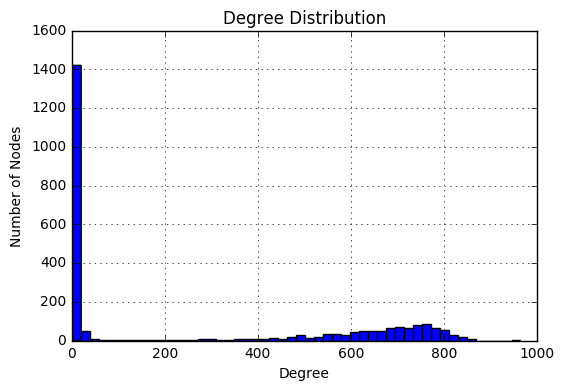

In [19]:
fig, ax = plt.subplots()
s.hist(ax=ax, bins=50)
ax.set_title("Degree Distribution")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")

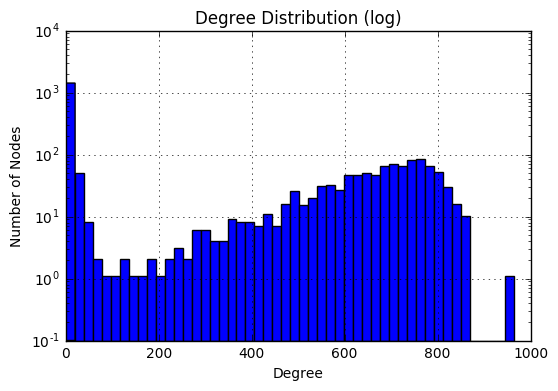

In [26]:
fig, ax = plt.subplots()
s.hist(ax=ax, bins=50, bottom=0.1)
ax.set_yscale('log')
ax.set_title("Degree Distribution (log)")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")

In [23]:
c = Counter(s)

In [24]:
s.describe()

count    2461.000000
mean      264.912637
std       330.734505
min         1.000000
25%         2.000000
50%         8.000000
75%       645.000000
max       965.000000
dtype: float64

# Edge weights distribution

In [20]:
l = []

In [21]:
for e in G.edges():
    l.append(G.get_edge_data(e[0],e[1]).get("weight"))

In [22]:
edge_weights = Series(l)

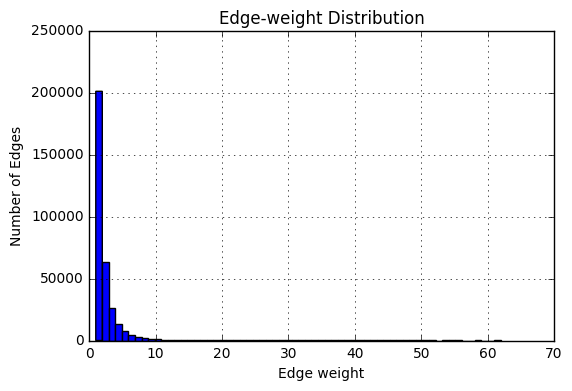

In [24]:
fig, ax = plt.subplots()
edge_weights.hist(ax=ax, bins=62)
ax.set_title("Edge-weight Distribution")
ax.set_xlabel("Edge weight")
ax.set_ylabel("Number of Edges")

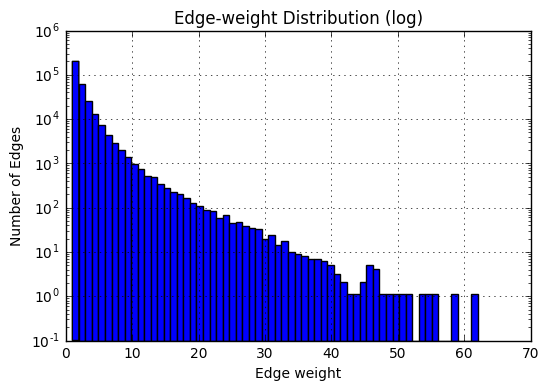

In [25]:
fig, ax = plt.subplots()
edge_weights.hist(ax=ax, bins=62, bottom=0.1)
ax.set_yscale('log')
ax.set_title("Edge-weight Distribution (log)")
ax.set_xlabel("Edge weight")
ax.set_ylabel("Number of Edges")

In [30]:
edge_weights.describe()

count    325975.000000
mean          1.962700
std           2.209585
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          62.000000
dtype: float64

In [31]:
ew = Counter(edge_weights)

In [53]:

Gcc0 = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print("Number of components: {}".format(len(Gcc0)))

size_components0 = []
for comp in Gcc0:
    size_components0.append(nx.number_of_nodes(comp))
    
Counter(list(size_components0))

Number of components: 1


Counter({2461: 1})

## Remove edges with weight 1
Welche Kanten entfernt werden (thesholding) wird weiter unten genauer untersucht. Hier werden erstmal nur Kanten mit Gewicht 1 entfernt.

In [36]:
G1 = G.copy()

In [37]:
for e in G1.edges():
    if (G1.get_edge_data(e[0],e[1]).get("weight") < 2):
        G1.remove_edge(e[0],e[1])

In [38]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 2461
Number of edges: 125003
Average degree: 101.5872


In [39]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2461
Number of edges: 325975
Average degree: 264.9126


In [40]:
G1.number_of_edges()*100/G.number_of_edges()

38.34741928061968

In [41]:
# nx.write_graphml(G1,"1day20150822_0.95conf_160dist_3ilen_filtered.graphml")

## Global structure (network level metrics)

- [X] number of components (size distribution of components)
- [X] diameter (for biggest component!)
- [X] size of biggest component
- [X] size - nodes and edges


- [X] density
- [X] mean/average degree
- [X] degree distribution
- [X] global clustering coefficient (also for biggest component)


- [X] average path length

### Number of components and size distribution

In [42]:
# only for biggest subgraph
Gcc = sorted(nx.connected_component_subgraphs(G1), key = len, reverse=True)
print("Number of components: {}".format(len(Gcc)))

size_components = []
for comp in Gcc:
    size_components.append(nx.number_of_nodes(comp))
    
Counter(list(size_components))

Number of components: 964


Counter({1: 963, 1498: 1})

There is one big component with 1498 nodes.

### Biggest component

#### Diameter

In [43]:
G0 = Gcc[0]
diameter = nx.diameter(G0)
print("Diameter: {}".format(diameter))

Diameter: 4


#### Nodes and Edges

In [44]:
g0n = nx.number_of_nodes(G0)
g0e = nx.number_of_edges(G0)
print("Number of nodes: {}".format(g0n))
print("Number of edges: {}".format(g0e))

Number of nodes: 1498
Number of edges: 125003


#### Density

In [45]:
density = nx.density(G0)
print("Density: {}".format(density))

Density: 0.11148509747577041


#### Average Degree

In [46]:
degrees = G0.degree().values()
average_degree = sum(degrees)/g0n
print("Average degree: {}".format(average_degree))

Average degree: 166.8931909212283


#### Degree Distribution

In [47]:
degree_distribution = Series(list(degrees))

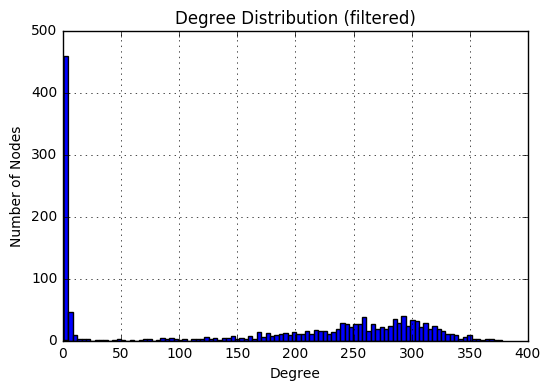

In [52]:
fig, ax = plt.subplots()
degree_distribution.hist(ax=ax, bins=100)

#ax.set_yscale('log')
ax.set_title("Degree Distribution (filtered)")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")

In [57]:
degree_distribution.describe()

count    2461.000000
mean      264.912637
std       330.734505
min         1.000000
25%         2.000000
50%         8.000000
75%       645.000000
max       965.000000
dtype: float64

#### global clustering coefficient

In [44]:
cc = nx.average_clustering(G1)
cc0 = nx.average_clustering(G0)
print("CC: {}".format(cc))
print("CC biggest component: {}".format(cc0))

CC: 0.1668284983624336
CC biggest component: 0.2740753901668552


#### Average shortest path length

In [45]:
average_shortest_path = nx.average_shortest_path_length(G0)

In [46]:
print("Average shortest path: {}".format(average_shortest_path))

Average shortest path: 2.3117378504226966


### Was habe ich nun davon?
Jetzt kommen hier irgendwelche Werte raus. Was mach ich mit denen?
Ich müsste die ja mit irgendwas vergleichen. Ich könnte die zum Beispiel mit anderen Studien vergleichen.


Das mit dem Vergleichen von verschiedenen Netzwerken ist aber doch nicht soooo sinnvoll, bzw. man sollte aufpassen. [cite!]


### Density
*Mersch - Ameisen*

Die haben eine Density von 0.75 (dannach wurden dann edges entfernt um besser die Communities zu finden).
Hier ist die Density bei 0.1, bevor ich edges entfernt habe mit kleiner als 2 edge weight. So was sagt das jetzt. Ameisen reden mit allen Ameisen, Bienen wohl anscheinende nicht. Aber Achtung Achtung, verschieden konstruierte Netzwerke lassen sich nur beschränkt vergleichen. Obwohl ich jetzt davon aus gehen würde das das hier ok ist, da meine proximity eigentlich mehr umfassen müsste als Merschs-Interaktions-Ding.

*Baracchi - Honey Bees*

0.15, very low, compared to random network with same number of nodes and ties (What???? verstehe ich nicht). Hm.
Also in dem Bereich bewege ich mich ja anscheinend auch. Das ist ja nett. Haben beide eine Ähnliche definition von interaktion/proximity verwendet.


### Vorschlag von TU Menschen from long long ago

Comparison with:
* A) natural bees Networks (if we can find in the literature)
* B) Random geometric graphs (die sehen ganz passend aus irgendwie)
* C) mammals networks, e.g. Dolphins (warum würde man das machen wollen?)

### Mit Random Graph vergleichen?
Wenn ich da wieder drüber nachdenke, dann kann man sich ja einen random graph erzeugen, man hat eine große Auswahl: https://graph-tool.skewed.de/static/doc/generation.html oder http://networkx.readthedocs.io/en/stable/reference/generators.html und dann kann man die Netwerkeigenschaften untereinander vergleichen. Was bringt das denn? Warum sollte ich das machen wollen? Das würde ich doch nur machen wollen, wenn ich etwas bestimmtes zeigen möchte oder? Ich habe keine Ahnung was ich hier mit machen soll!

### Is it a real network? Or created by chance? Does it make a difference?
* degree distribution (not biniminal/poisson) - ja sieht nicht binominalverteilt aus, sieht ziemlich nach scale free, wenige hubs, viele knote mit wenig links (aber komischer Berg auf der rechten Seite!)
* connectedness (giant component) - ja sieht ziemlich verbunden aus alles, gibt nur eine große komponente
* average path length (~diameter) - ist hier auch ziemlich klein, Small-world phenomenon, $d = \frac{\ln nodes}{\ln av degree}$
* clustering coefficient - müsste höher sein als bei einem random network, jep ist es auch

In [89]:
random_g0 = nx.erdos_renyi_graph(n=nx.number_of_nodes(G0), p=density)

In [90]:
nx.info(random_g0)

'Name: gnp_random_graph(1498,0.11148509747577041)\nType: Graph\nNumber of nodes: 1498\nNumber of edges: 125148\nAverage degree: 167.0868'

In [91]:
nx.number_of_edges(G0)

125003

In [92]:
nx.average_clustering(random_g0)

0.11170937857183524

In [93]:
nx.average_clustering(G0)

0.27407539016685495

So was hat man nun davon, man weiß jetzt das genau dieses Netzwerk kein random Netzwerk ist. Jetzt weiß ich es ist ein echtes Netzwerk. Scale-free, small world. D.h, wenn man jetzt eine bestimmte Eigenschaft des echten Netzwerks untersucht, dann kann man diese auch im random Netzwerk untersuchen. Gibt es die dort auch, dann ensteht es durch zufall, wenn nicht, dann ist dies Eigenschaft durch irgendwas entstanden. Was/wann bringt einem das was???

Was ist mit Centralisation (degree, closeness, usw.)?

## Local structure (node level metrics)
- [X] node degree - look at degree distribution
- [X] centrality measures (degree, closeness, betweenness, eigenvector)
- [O] edge weights (siehe ganz oben)

### Degree distribution

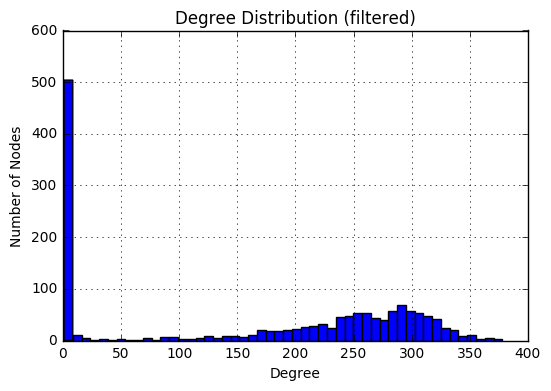

In [55]:
fig, ax = plt.subplots()
degree_distribution.hist(ax=ax, bins=50)
ax.set_title("Degree Distribution (filtered)")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")

It is a bit strange that on the right is a little hill :)

### Degree centrality
http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.degree_centrality.html#degree-centrality

In [57]:
import operator

In [58]:
dc = nx.degree_centrality(G0)
sorted_dc = sorted(dc.items(), key=operator.itemgetter(1))

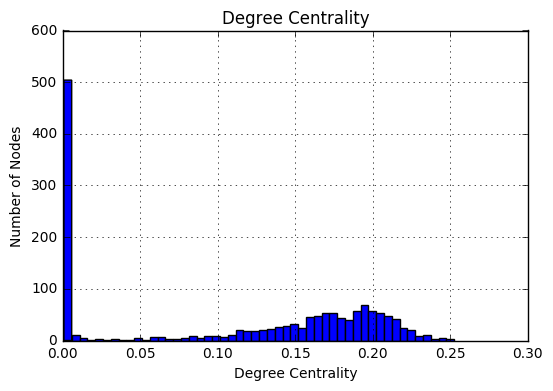

In [59]:
fig, ax = plt.subplots()
Series(dc).hist(ax=ax, bins=50)
ax.set_title("Degree Centrality")
ax.set_xlabel("Degree Centrality")
ax.set_ylabel("Number of Nodes")

### Closeness centrality
http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.closeness_centrality.html#closeness-centrality

In [61]:
closeness_c = nx.closeness_centrality(G0)

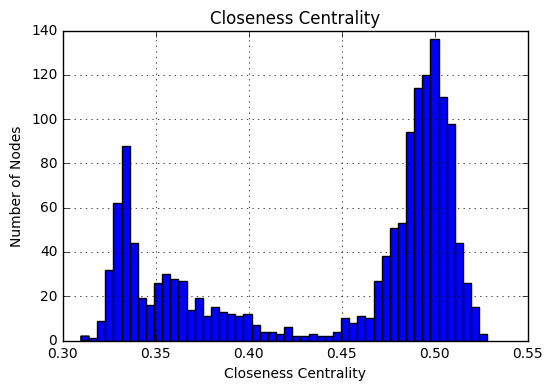

In [62]:
fig, ax = plt.subplots()
Series(closeness_c).hist(ax=ax, bins=50)
ax.set_title("Closeness Centrality")
ax.set_xlabel("Closeness Centrality")
ax.set_ylabel("Number of Nodes")

### Betweenness Centrality
http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html#betweenness-centrality

In [63]:
betweenness_c = nx.betweenness_centrality(G0)

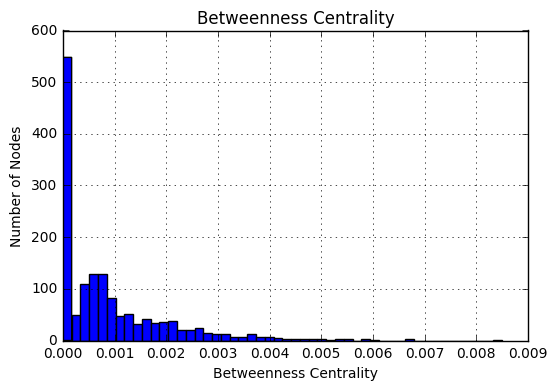

In [64]:
fig, ax = plt.subplots()
Series(betweenness_c).hist(ax=ax, bins=50)
ax.set_title("Betweenness Centrality")
ax.set_xlabel("Betweenness Centrality")
ax.set_ylabel("Number of Nodes")

### Eigenvector
http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html#eigenvector-centrality

In [65]:
eigenvector_c = nx.eigenvector_centrality(G0)

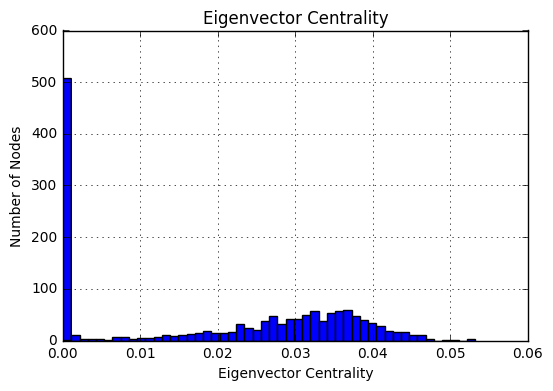

In [66]:
fig, ax = plt.subplots()
Series(eigenvector_c).hist(ax=ax, bins=50)
ax.set_title("Eigenvector Centrality")
ax.set_xlabel("Eigenvector Centrality")
ax.set_ylabel("Number of Nodes")

## Community detection
- [X] cliques (dauert ewig, daher gepickelt)
- [O] communities

### Cliques
http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.clique.enumerate_all_cliques.html#networkx.algorithms.clique.enumerate_all_cliques

In [72]:
def get_cliques(G0):
    cliques = list(nx.enumerate_all_cliques(G0))
    clique_s = Series(cliques)
    # clique_s.to_pickle("/storage/mi/aschle/1day20150822_0.95conf_160dist_3ilen_filtered-cliques.pickle")

In [129]:
cl = list(cliques)

In [133]:
len(cl)

144304589

In [139]:
length_cl = []
for cli in cl:
    length_cl.append(len(cli))

In [141]:
Counter(length_cl)

Counter({1: 1498,
         2: 124978,
         3: 3345112,
         4: 24535230,
         5: 56536779,
         6: 45010845,
         7: 13189732,
         8: 1491471,
         9: 67683,
         10: 1252,
         11: 9})

In [143]:
biggest_clique = [c for c in cliques if len(c) == 11]

In [144]:
biggest_clique[0]

[['704',
  '3149',
  '3583',
  '232',
  '3938',
  '3122',
  '80',
  '996',
  '2601',
  '3559',
  '3498'],
 ['704',
  '3149',
  '3583',
  '232',
  '3938',
  '3122',
  '80',
  '2601',
  '3821',
  '3559',
  '3498'],
 ['704',
  '3149',
  '3583',
  '232',
  '3122',
  '80',
  '996',
  '2601',
  '3559',
  '3498',
  '96'],
 ['704',
  '3583',
  '232',
  '3938',
  '3127',
  '3122',
  '80',
  '996',
  '2601',
  '3559',
  '3498'],
 ['704',
  '3583',
  '232',
  '3938',
  '3127',
  '3122',
  '80',
  '996',
  '2601',
  '3559',
  '3213'],
 ['928',
  '2059',
  '2739',
  '1000',
  '688',
  '2710',
  '3577',
  '68',
  '2349',
  '3451',
  '2462'],
 ['3426',
  '3587',
  '3463',
  '3279',
  '3961',
  '1028',
  '3713',
  '3537',
  '2454',
  '2843',
  '544'],
 ['2753',
  '3406',
  '4093',
  '3286',
  '3647',
  '2430',
  '3411',
  '688',
  '536',
  '2770',
  '4077'],
 ['3982',
  '3362',
  '2668',
  '800',
  '2062',
  '992',
  '3321',
  '568',
  '3621',
  '3267',
  '2839']]

So man könnte sich jetzt zum Beispiel mal die Cliquen näher anschauen. Wer ist da so drin? Wie sind die cliquen an dem einen tag, wie an dem nächsten Tag, sind diese gleich? Also gleichen Bienen in den cliquen?

### Communities

Dauert super lange, also viel zu lange, und braucht viel zu viel RAM, lounge war komplett voll, und 12 stunden rechnen hat auch nicht gereicht.

# Performance
* one should consider using graph-tool instead of networkx maybe:
https://graph-tool.skewed.de/performance

# Thresholding Edges - compare network properties
Wenn ich mir die Verteilung der Edge Weights anschaue, wie entscheide ich, welche Edge Weights ich wegschmeiße?

In [67]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2461
Number of edges: 325975
Average degree: 264.9126


In [68]:
edge_weights.describe()

count    325975.000000
mean          1.962700
std           2.209585
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          62.000000
dtype: float64

In [69]:
max_ew = edge_weights.max()

In [70]:
GG = G.copy()

In [71]:
def get_properties(g):
    n = g.number_of_nodes()
    e = g.number_of_edges()
    d = nx.density(g)
    cc = nx.average_clustering(g)
    degrees = g.degree().values()
    
    # Number of components
    Gcc = sorted(nx.connected_component_subgraphs(g), key = len, reverse=True)
    components = len(Gcc)
    
    # Size of components
    size_components = []
    for comp in Gcc:
        size_components.append(nx.number_of_nodes(comp))
    size_components = Counter(list(size_components))
    
    # Biggest component
    g0 = Gcc[0]
    
    g0n = nx.number_of_nodes(g0)
    g0e = nx.number_of_edges(g0)
    diameter = nx.diameter(g0)
    density = nx.density(g0)
    g0degrees = g0.degree().values()
    average_degree = sum(g0degrees)/g0n
    
    cc0 = nx.average_clustering(g0)
    average_shortest_path = nx.average_shortest_path_length(g0)

    return {"nodes": n, "edges":e, "density":d, "cc":cc, "degrees":degrees, "components": components,
           "sizeComponents": size_components, "nodes-g0": g0n, "edges-g0":g0e, "diameter-g0":diameter,
           "density-g0":density, "degrees-g0": g0degrees, "average-degree-g0": average_degree,
           "cc-g0":cc0, "av-shortest-path-g0":average_shortest_path}

In [72]:
properties = []
for i in list(range(1,max_ew)):
    for e in GG.edges():
        if (GG.get_edge_data(e[0],e[1]).get("weight") <= i):
            GG.remove_edge(e[0],e[1])
    
    p = get_properties(GG)
    p["threshold"] = i
    properties.append(p)

In [73]:
df = DataFrame(properties)

In [74]:
df.head(3)

,av-shortest-path-g0,average-degree-g0,cc,cc-g0,components,degrees,degrees-g0,density,density-g0,diameter-g0,edges,edges-g0,nodes,nodes-g0,sizeComponents,threshold
0,2.311738,166.893191,0.166828,0.274075,964,"(0, 253, 318, 260, 4, 224, 1, 85, 292, 2, 0, 0...","(253, 318, 260, 4, 275, 2, 292, 2, 1, 242, 114...",0.041296,0.111485,4,125003,125003,2461,1498,"{1: 963, 1498: 1}",1
1,2.264231,98.757624,0.074680,0.147501,1216,"(0, 131, 169, 126, 1, 106, 1, 46, 158, 0, 0, 0...","(131, 169, 126, 1, 117, 3, 1, 70, 1, 168, 176,...",0.020326,0.079323,5,61526,61526,2461,1246,"{1: 1215, 1246: 1}",2
2,2.223726,62.529464,0.043205,0.093516,1325,"(0, 83, 95, 74, 1, 67, 1, 27, 99, 0, 0, 0, 64,...","(83, 66, 74, 1, 61, 86, 1, 1, 88, 107, 79, 77,...",0.011744,0.055044,5,35548,35548,2461,1137,"{1137: 1, 1: 1324}",3


In [75]:
df.columns

Index(['av-shortest-path-g0', 'average-degree-g0', 'cc', 'cc-g0', 'components',
       'degrees', 'degrees-g0', 'density', 'density-g0', 'diameter-g0',
       'edges', 'edges-g0', 'nodes', 'nodes-g0', 'sizeComponents',
       'threshold'],
      dtype='object')

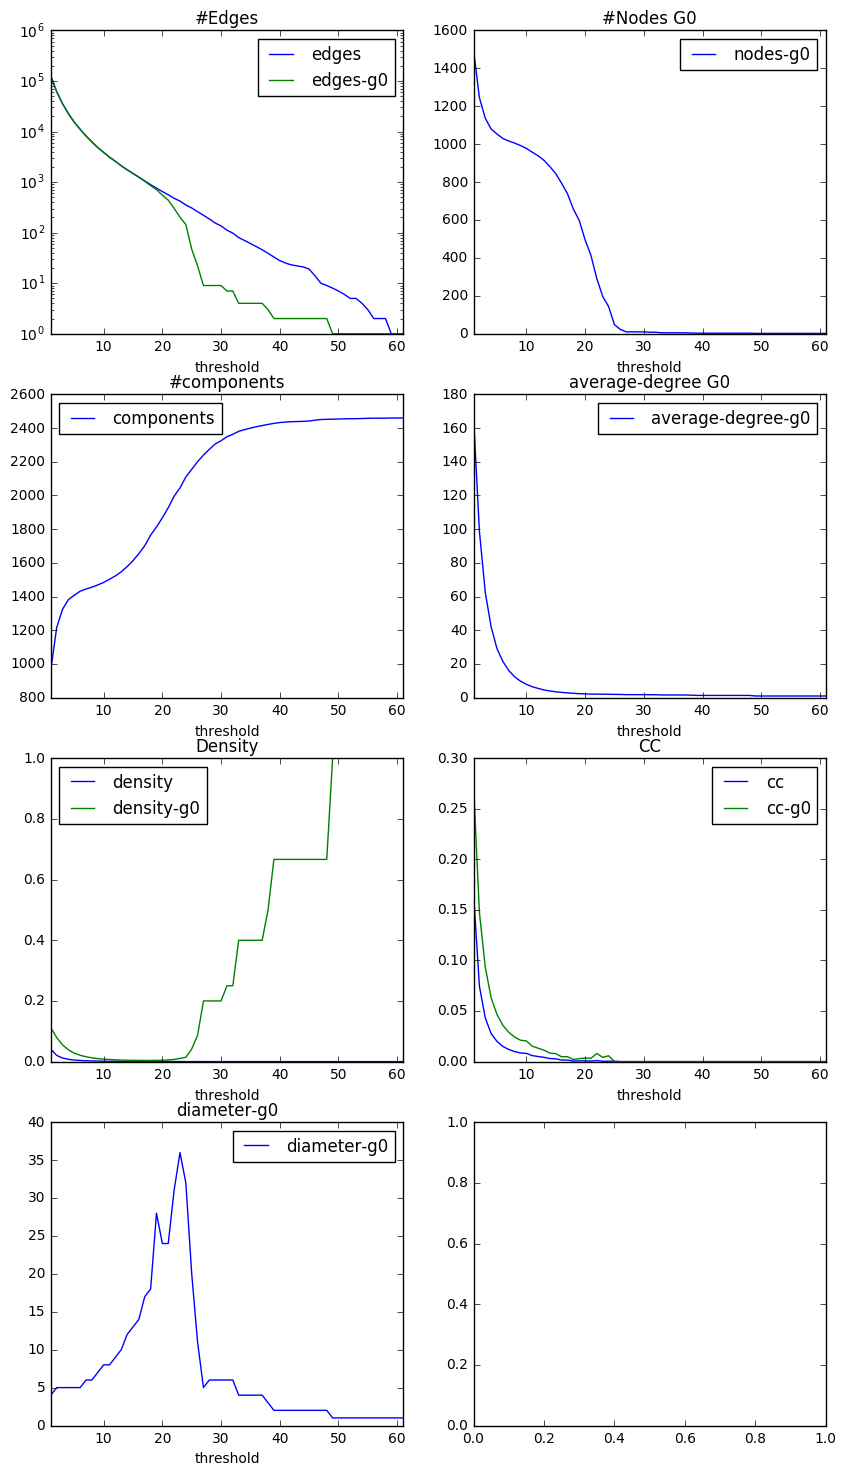

In [76]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,18), )

df.plot(ax=axes[0,0], x='threshold', y='edges')
df.plot(ax=axes[0,0], x='threshold', y='edges-g0')
axes[0,0].set_title('#Edges')
axes[0,0].set_yscale('log')

df.plot(ax=axes[0,1], x='threshold', y='nodes-g0')
axes[0,1].set_title('#Nodes G0')


df.plot(ax=axes[1,0], x='threshold', y='components')
axes[1,0].set_title('#components')

df.plot(ax=axes[1,1], x='threshold', y='average-degree-g0')
axes[1,1].set_title('average-degree G0')


df.plot(ax=axes[2,0], x='threshold', y='density')
df.plot(ax=axes[2,0], x='threshold', y='density-g0')
axes[2,0].set_title('Density')


df.plot(ax=axes[2,1], x='threshold', y='cc')
df.plot(ax=axes[2,1], x='threshold', y='cc-g0')
axes[2,1].set_title('CC')


df.plot(ax=axes[3,0], x='threshold', y='diameter-g0')
axes[3,0].set_title('diameter-g0')

# Number of Edges

In [77]:
total = G.number_of_edges()

In [78]:
total

325975

In [79]:
df['edges_percent'] = df.edges*100/total

In [98]:
df.head(20)

,av-shortest-path-g0,average-degree-g0,cc,cc-g0,components,degrees,degrees-g0,density,density-g0,diameter-g0,edges,edges-g0,nodes,nodes-g0,sizeComponents,threshold,edges_percent
0,2.311738,166.893191,0.166828,0.274075,964,"(0, 253, 318, 260, 4, 224, 1, 85, 292, 2, 0, 0...","(253, 318, 260, 4, 275, 2, 292, 2, 1, 242, 114...",0.041296,0.111485,4,125003,125003,2461,1498,"{1: 963, 1498: 1}",1,38.347419
1,2.264231,98.757624,0.074680,0.147501,1216,"(0, 131, 169, 126, 1, 106, 1, 46, 158, 0, 0, 0...","(131, 169, 126, 1, 117, 3, 1, 70, 1, 168, 176,...",0.020326,0.079323,5,61526,61526,2461,1246,"{1: 1215, 1246: 1}",2,18.874454
2,2.223726,62.529464,0.043205,0.093516,1325,"(0, 83, 95, 74, 1, 67, 1, 27, 99, 0, 0, 0, 64,...","(83, 66, 74, 1, 61, 86, 1, 1, 88, 107, 79, 77,...",0.011744,0.055044,5,35548,35548,2461,1137,"{1137: 1, 1: 1324}",3,10.905131
3,2.290938,41.927778,0.027630,0.062961,1382,"(0, 48, 64, 47, 1, 40, 1, 19, 56, 0, 0, 0, 37,...","(48, 49, 47, 1, 40, 47, 1, 1, 55, 72, 51, 37, ...",0.007480,0.038858,5,22641,22641,2461,1080,"{1080: 1, 1: 1381}",4,6.945625
4,2.481768,29.085389,0.019928,0.046531,1408,"(0, 34, 47, 30, 1, 25, 1, 15, 33, 0, 0, 0, 23,...","(34, 33, 30, 1, 31, 34, 1, 1, 38, 54, 36, 30, ...",0.005064,0.027621,5,15328,15328,2461,1054,"{1: 1407, 1054: 1}",5,4.702201
5,2.662487,21.491262,0.014985,0.035805,1432,"(0, 24, 32, 23, 1, 20, 0, 12, 26, 0, 0, 0, 15,...","(24, 21, 23, 1, 23, 24, 21, 24, 41, 25, 15, 10...",0.003656,0.020886,5,11068,11068,2461,1030,"{1: 1431, 1030: 1}",6,3.395352
6,2.843588,16.131760,0.011979,0.028987,1445,"(0, 18, 24, 17, 0, 15, 0, 11, 16, 0, 0, 0, 6, ...","(18, 18, 17, 15, 16, 18, 30, 19, 20, 7, 16, 20...",0.002710,0.015878,6,8203,8203,2461,1017,"{1017: 1, 1: 1444}",7,2.516451
7,3.051775,12.401590,0.009901,0.024222,1456,"(0, 12, 20, 15, 0, 10, 0, 11, 11, 0, 0, 0, 1, ...","(12, 12, 15, 10, 18, 12, 22, 13, 17, 5, 6, 16,...",0.002061,0.012340,6,6238,6238,2461,1006,"{1: 1455, 1006: 1}",8,1.913644
8,3.306588,9.752266,0.008535,0.021154,1469,"(0, 10, 17, 13, 0, 10, 0, 7, 8, 0, 0, 0, 1, 0,...","(10, 15, 13, 10, 9, 8, 9, 19, 6, 14, 5, 4, 14,...",0.001600,0.009831,7,4842,4842,2461,993,"{993: 1, 1: 1468}",9,1.485390
9,3.566659,7.914110,0.008127,0.020449,1484,"(0, 8, 11, 12, 0, 6, 0, 7, 7, 0, 0, 0, 1, 0, 0...","(8, 12, 12, 6, 7, 7, 14, 5, 12, 5, 2, 11, 1, 9...",0.001278,0.008100,8,3870,3870,2461,978,"{1: 1483, 978: 1}",10,1.187208


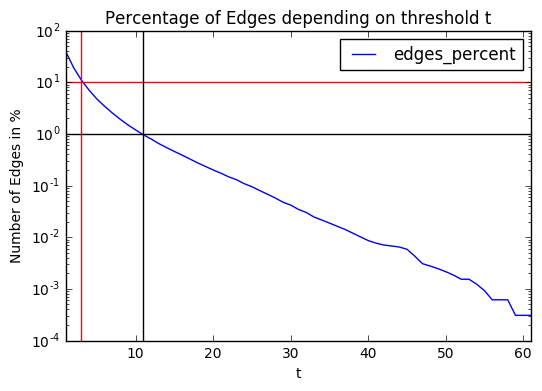

In [87]:
fig, ax = plt.subplots()
df.plot(ax=ax, x='threshold', y='edges_percent')
plt.plot((0, 62), (1, 1), 'k-')
plt.plot((0, 62), (10, 10), 'r-')
plt.plot((3, 3), (0, 100), 'r-')
plt.plot((11, 11), (0, 100), 'k-')
ax.set_yscale('log')
ax.set_title("Percentage of Edges depending on threshold t")
ax.set_xlabel("t")
ax.set_ylabel("Number of Edges in %")


## Number of components

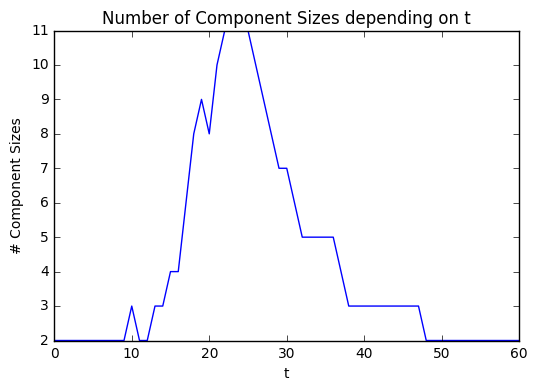

In [113]:
fig, ax = plt.subplots()
df.sizeComponents.apply(len).plot(ax=ax)
ax.set_title("Number of Component Sizes depending on t")
ax.set_xlabel("t")
ax.set_ylabel("# Component Sizes")

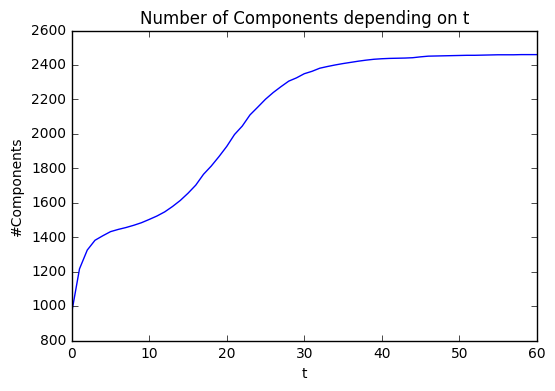

In [115]:
fig, ax = plt.subplots()
df.sizeComponents.apply(lambda x: Series(x).sum()).plot()
ax.set_title("Number of Components depending on t")
ax.set_xlabel("t")
ax.set_ylabel("#Components")